In [1]:
import myfunctions as mf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib import colors

In [2]:
plt.style.use('teststyle.mplstyle')
#plt.plot([0,1,2], [4,3,6])

In [3]:
import helperfile as hf

In [4]:
rootfile = uproot.open('./stage3_clusters_momentuminfo_corr.root')
inputdata = hf.InputData(rootfile)
inputdata.form_cluster()
inputdata.train_test_split()
inputdata.prep_trainingsdata()
inputdata.prep_verificationdata()

Initialized object
Start shaping clusters in a  (5, 5)  grid...
Shaping the clusters took  160.35778546333313 s
Splitted data into training and test set!
Prepared 'training' data
Prepared 'veri_truth' data
Prepared 'veri_fit' data


In [5]:
# winkel gegen cluster groesse
theta = np.arccos(inputdata.momentum.T[2]/ (np.linalg.norm(inputdata.momentum, axis=1)))

In [6]:
Ecells = inputdata.EMC

In [7]:
clustersize = np.zeros(len(Ecells))
for i in range(len(Ecells)):
    clustersize[i] = len(Ecells[i])

In [8]:
histo, ex, ey = np.histogram2d(theta, clustersize, bins=20)

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


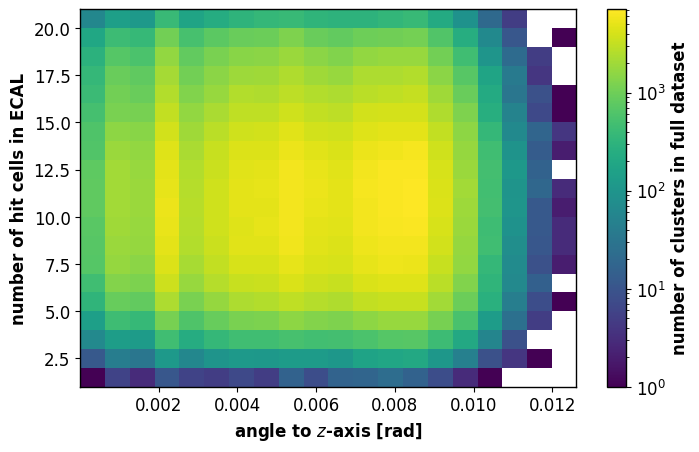

In [9]:
plt.imshow(histo, extent=[ex[0], ex[-1], ey[0], ey[-1]], aspect="auto", norm=colors.LogNorm())
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('number of hit cells in ECAL')
plt.colorbar(label='number of clusters in full dataset')
plt.show()

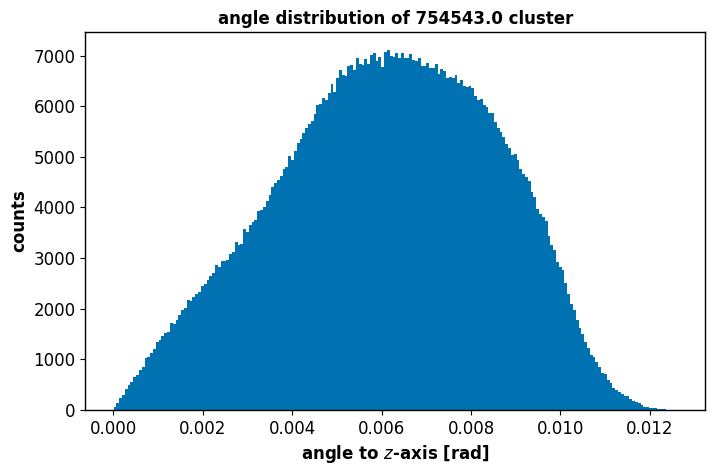

In [10]:
n, _, _ = plt.hist(theta, bins=200)
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' cluster')
plt.show()

Soll ich da bissi data augmentation machen? Damit ich mehr Daten für größere Winkel habe? 

<h2>  New dataset...

In [11]:
rootfile_new = uproot.open('./stage3_clusters_corr_newdata.root')
ipd = hf.InputData(rootfile_new)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (5, 5)  grid...
Shaping the clusters took  136.04482245445251 s
Splitted data into training and test set!
Prepared 'training' data
Prepared 'veri_truth' data
Prepared 'veri_fit' data


In [12]:
# winkel gegen cluster groesse
theta_new = np.arccos(ipd.momentum.T[2]/ (np.linalg.norm(ipd.momentum, axis=1)))

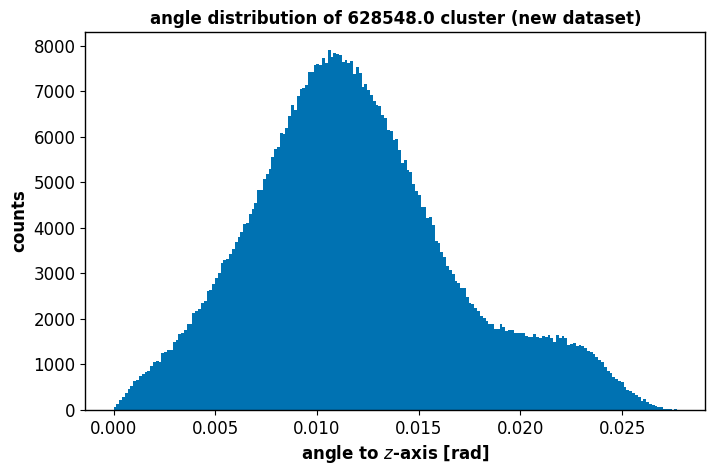

In [13]:
n, _, _ = plt.hist(theta_new, bins=200)
plt.xlabel('angle to $z$-axis [rad]')
plt.ylabel('counts')
plt.title('angle distribution of ' + str(np.sum(n)) + ' cluster (new dataset)')
plt.show()